curveOrder= 3
nv= 105  nedge= 434  nfacet= 570  ne= 239


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

enter iccg_solve
Dof= 1160    Nonzeros= 47242
shift parameter= 1.0
minimum residual= 6.454369271466025e-09  at iteraions:  29


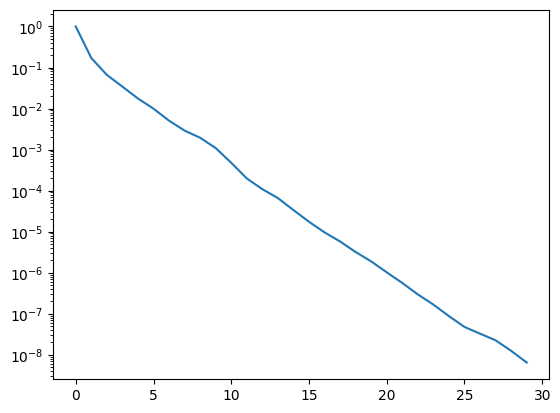

ICCG calculation time (sec): 0.004686600000241015
feOrder= 3    ndof= 1543   
経過時間: 0.5195 秒  
center magnetic field =  (-1.1283327138464487e-12, 0.0018076501141147043, 2.9931296667474485)   
 Average magnetic energy in conductor=


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

In [1]:
from ngsolve import *
from netgen.occ import *
from ngsolve.webgui import Draw
from netgen.webgui import Draw as DrawGeo  
sys.path.append(r'..\Static') 
from Omega_ReducedOmega import Omega_ReducedOmega_Method
from A_ReducedOmega import A_ReducedOmega_Method
from A_ReducedA import A_ReducedA_Method
from A_Phi_ReducedA import A_Phi_ReducedA_Method
sys.path.append(r'..\bin\Release') 
from EMPY_Field import *
sys.path.append(r'..\model')
from SphereMesh import SphereMesh
from BathPlateModel import BathPlateModel
from Team7Model import Team7Model


#model=SphereMesh(mur=1, sigma=5.e7, msize=meshsize.coarse, curveOrder=3, rKelvin=2)
model=SphereMesh(mur=1000,  msize=meshsize.coarse, curveOrder=3, rKelvin=2)
Draw(model.mesh)
#DrawGeo(model.geo)

feOrder=3
cal=Omega_ReducedOmega_Method(model,  feOrder=feOrder, boundaryCD="Bn0", Kelvin="on")
#cal=A_Phi_ReducedA_Method(model, jomega=True, freq=0.1)
cal.Calc( feOrder=feOrder, Kelvin="on", boundaryCD="Bn0", regularization=False, tol=1.e-8)
cal.CalcResult(model, plotBFieldonLine=False, drawFields=True, pltBField=True)
#maxerror, error=cal.CalcError()
#cal.CalcError()


Mathematica  
Um=24109.6 - 17110.9 I  
Pj=18305.3 + 32993.2 I  

very caorse ne=44    
Um=29152.977730838058-20618.858657114157j    
Pj=15048.519194226223+33252.89982907082j

coarse  
Um=26146.590373414005-18569.488874054114j  
Pj=16802.860226759993+31796.38000918764j  

moderate  
Um=24143.289346728347-17094.02370193622j   
Pj=18318.698319999978+32968.13309954526j   

fine    
Um=24121.69360674798-17104.760817407318j   
Pj=18309.888121815544+32984.582040425186j      

very_fine  ne= 5004  
Um=24111.180175803653-17109.842896500486j
Pj=18306.565250782296+32992.76067689554j   

In [2]:
"""
iter=0
#for iter in range(6):
while True:
    iter=iter+1
    print("Adaptive iteration: ",iter) 
    maxerror, error=cal.CalcError()
    cal.Refine(maxerror, error)
    Draw(mesh)
    cal=A_Phi_ReducedA_Method(model, jomega=True, freq=0.1)
    rt=cal.Calc(feOrder=feOrder, Kelvin="on", boundaryCD="Bn0", regularization=False, tol=1.e-8)
    if rt==0: break
    cal.CalcResult(model, plotBFieldonLine=False, drawFields=True, pltBField=True)
    #cal=Omega_ReducedOmega_Method(model, coil, feOrder=feOrder, boundaryCD="Bn0")
"""


'\niter=0\n#for iter in range(6):\nwhile True:\n    iter=iter+1\n    print("Adaptive iteration: ",iter) \n    maxerror, error=cal.CalcError()\n    cal.Refine(maxerror, error)\n    Draw(mesh)\n    cal=A_Phi_ReducedA_Method(model, jomega=True, freq=0.1)\n    rt=cal.Calc(feOrder=feOrder, Kelvin="on", boundaryCD="Bn0", regularization=False, tol=1.e-8)\n    if rt==0: break\n    cal.CalcResult(model, plotBFieldonLine=False, drawFields=True, pltBField=True)\n    #cal=Omega_ReducedOmega_Method(model, coil, feOrder=feOrder, boundaryCD="Bn0")\n'

Mathematica  
Um=24109.6 - 17110.9 I                                                              Pj=18305.3 + 32993.2 I  
Magnetic energy in conductor= (29152.977730838058-20618.858657114157j)  Joule loss=  (15048.519194226223+33252.89982907082j)
Magnetic energy in conductor= (37828.302384307855-26242.38463379714j)  Joule loss=  (25974.64687238716+48810.56282285748j)
Magnetic energy in conductor= (24058.853347047072-16708.54626287997j)  Joule loss=  (17734.066554176097+32439.74892019239j)  